# **Présentation de notre projet**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [96]:
nombre_patient = 100
nombre_docteur = 30

In [97]:
def position (n):
    return (np.random.uniform(0,1,size = (n)), np.random.uniform(0,1,size = (n)))
    

In [98]:
position_docteur = position(nombre_docteur)
position_patient = position(nombre_patient)
position_docteur

(array([0.07835494, 0.66378524, 0.48184422, 0.60434441, 0.16322931,
        0.92084406, 0.56402184, 0.88669807, 0.02513939, 0.81075263,
        0.57058094, 0.97986609, 0.9188876 , 0.07136295, 0.06170272,
        0.9515147 , 0.27403155, 0.85719105, 0.49834735, 0.87530519,
        0.46140846, 0.84752514, 0.96926374, 0.92917245, 0.75990531,
        0.99476753, 0.77667869, 0.88674538, 0.98799618, 0.31886885]),
 array([0.48036053, 0.72069408, 0.17400929, 0.10892936, 0.31246372,
        0.45468251, 0.10241521, 0.21862789, 0.33489674, 0.45669718,
        0.25409412, 0.45612603, 0.21289292, 0.04662356, 0.49817684,
        0.43769896, 0.06725969, 0.27736171, 0.96413101, 0.11210376,
        0.75096107, 0.62942534, 0.52713643, 0.07355128, 0.89804567,
        0.49633343, 0.18193328, 0.67289486, 0.29927087, 0.3188865 ]))

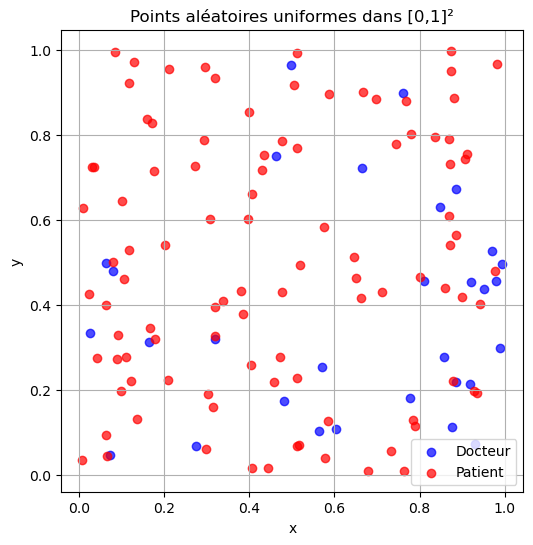

In [99]:
#On représente les points sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [100]:
matrice_distance = np.zeros((nombre_patient, nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        matrice_distance[i,j] = np.sqrt((position_patient[1][i]-position_docteur[1][j])**2+(position_patient[0][i]-position_docteur[0][j])**2)
matrice_distance

array([[0.52054961, 0.15883173, 0.59482032, ..., 0.3864653 , 0.66795282,
        0.48900077],
       [0.56921376, 0.20914933, 0.37626203, ..., 0.28886316, 0.40231643,
        0.38058464],
       [0.36508563, 0.51882672, 0.7374937 , ..., 0.74683709, 0.98869761,
        0.54214116],
       ...,
       [0.82040898, 0.18758247, 0.7145346 , ..., 0.1316262 , 0.51790944,
        0.7027482 ],
       [0.01972816, 0.62437249, 0.51770324, ..., 0.82534715, 0.93021976,
        0.30003108],
       [0.3747512 , 0.37694497, 0.64210324, ..., 0.6048959 , 0.84957314,
        0.46950038]], shape=(100, 30))

In [101]:
#On calcule maintenant alpha_i et psi_j
alpha = np.random.randint(0,3,size=nombre_patient)/10
psi = np.random.randint(0,3,size=nombre_docteur)/10
alpha,psi

(array([0. , 0.2, 0.2, 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.2, 0.2, 0.1,
        0.1, 0.2, 0.2, 0.1, 0.2, 0.1, 0.1, 0. , 0. , 0.2, 0. , 0.2, 0.2,
        0.1, 0. , 0.1, 0. , 0. , 0.2, 0.2, 0. , 0.1, 0.2, 0.2, 0. , 0.2,
        0. , 0. , 0. , 0.1, 0.1, 0.2, 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.2,
        0.2, 0.2, 0.1, 0.2, 0. , 0.2, 0. , 0. , 0. , 0.1, 0.2, 0.1, 0.1,
        0.1, 0.1, 0.2, 0. , 0.2, 0. , 0. , 0.2, 0. , 0.1, 0.2, 0. , 0.1,
        0.1, 0. , 0.2, 0. , 0.2, 0.1, 0. , 0. , 0.2, 0.1, 0.1, 0.1, 0. ,
        0.1, 0.2, 0. , 0. , 0. , 0. , 0.1, 0.2, 0.2]),
 array([0.1, 0.1, 0. , 0.1, 0.1, 0. , 0.2, 0.2, 0. , 0.2, 0.1, 0.2, 0.1,
        0.2, 0.2, 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.2, 0.2, 0. , 0.1, 0. ,
        0.1, 0.2, 0. , 0.1]))

In [102]:
#On va maintenant générer Yij
lien = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        lambda_ij =-3.5*matrice_distance[i,j]-alpha[i]+psi[j]
        lien[i,j] = np.random.binomial(1,1-(1/(1+np.exp(lambda_ij))))
        #lien[i,j] = 1 if 0.5-1*matrice_distance[i,j]-alpha[i]+psi[j]+np.random.normal(0,1)>0 else 0
        #lien[i,j] = 1 if 0.5-1*matrice_distance[i,j]-alpha[j]+psi[i]+np.random.normal(0,1)>0 else 0
        #lien[i,j] = np.random.binomial(1,1/(1+np.exp(0.5*matrice_distance[i,j]+alpha[j]-psi[i]+np.random.normal(0,1))))
lien

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 30))

/tmp/ipykernel_21266/1930555695.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")


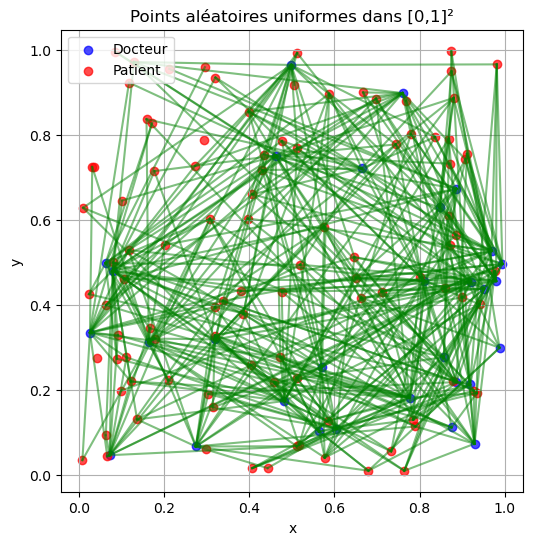

In [103]:
#On représente les Yij sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        if lien[i,j] == 1:
            plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [104]:
#On va maintenant faire la regression de Yij sur Xij, alpha_i et psi_j
model = LogisticRegression()
model.fit(matrice_distance.reshape(-1,1),lien.reshape(-1,1))
y_pred = model.predict(lien.reshape(-1,1))

/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
x = sm.add_constant(matrice_distance.reshape(-1,1))
model = sm.Probit(lien.reshape(-1,1), x)
result = model.fit()
print(result.summary())
proba= result.predict(x)
print(proba)
y_pred = (proba >= 0.5).astype(int)
y_pred

Optimization terminated successfully.
         Current function value: 0.378840
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3000
Model:                         Probit   Df Residuals:                     2998
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Apr 2025   Pseudo R-squ.:                  0.1026
Time:                        09:56:47   Log-Likelihood:                -1136.5
converged:                       True   LL-Null:                       -1266.4
Covariance Type:            nonrobust   LLR p-value:                 1.953e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0974      0.065     -1.509      0.131      -0.224       0.029
x1            -1.8759      0.

array([0, 0, 0, ..., 0, 0, 0], shape=(3000,))

In [106]:
#On regarde la distance entre la prédiction et la réalité
mse = mean_squared_error(lien.reshape(-1,1), y_pred)
mse

0.14966666666666667

In [107]:
alpha_sante = np.random.randint(0,3,size=nombre_patient)
psi_sante = np.random.randint(0,3,size=nombre_docteur)
psi_sante[len(psi_sante)-1]=0
alpha_sante,psi_sante

(array([2, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2,
        1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0,
        2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0,
        2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0,
        0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1]),
 array([2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0,
        0, 1, 1, 2, 0, 1, 0, 0]))

In [108]:
prix = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        prix[i,j] = 4 + alpha_sante[i] + psi_sante[j] + 3*matrice_distance[i,j]

In [109]:
patient_ids = np.repeat(np.arange(nombre_patient), nombre_docteur)
doctor_ids = np.tile(np.arange(nombre_docteur), nombre_patient)

df = pd.DataFrame({
    'patient_id': patient_ids,
    'doctor_id': doctor_ids,
    'distance': matrice_distance.flatten(),
    'link': lien.flatten(),
    'prix': prix.flatten()
})
df

,patient_id,doctor_id,distance,link,prix
0,0,0,0.520550,1.0,9.561649
1,0,1,0.158832,0.0,6.476495
2,0,2,0.594820,1.0,7.784461
3,0,3,0.665539,0.0,7.996616
4,0,4,0.573873,0.0,7.721618
...,...,...,...,...,...
2995,99,25,0.759987,0.0,9.279961
2996,99,26,0.775250,0.0,7.325751
2997,99,27,0.604896,0.0,7.814688
2998,99,28,0.849573,0.0,7.548719


### **On génère Y = DY\* **

In [110]:
y = np.zeros((nombre_patient, nombre_docteur))

for i in range(nombre_patient):
    for j in range(nombre_docteur):
        y[i,j] = prix[i,j]*lien[i,j]
y

array([[9.56164882, 0.        , 7.78446097, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.55648017, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 4.5627474 , 6.1436038 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(100, 30))

In [111]:
X_tild = np.zeros((nombre_patient*nombre_docteur,2))
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        X_tild[i*nombre_docteur+j][0]=1
        X_tild[i*nombre_docteur+j][1]=matrice_distance[i,j]

X_tild

array([[1.        , 0.52054961],
       [1.        , 0.15883173],
       [1.        , 0.59482032],
       ...,
       [1.        , 0.6048959 ],
       [1.        , 0.84957314],
       [1.        , 0.46950038]], shape=(3000, 2))

In [112]:
A_tild = np.zeros((nombre_patient*nombre_docteur,nombre_patient))
for i in range(nombre_patient*nombre_docteur):
        n = i//nombre_docteur
        A_tild[i][n]=1

print(A_tild)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [113]:
B_tild = np.zeros((nombre_patient*nombre_docteur,nombre_docteur))
for i in range(nombre_patient*nombre_docteur):
        n = i%nombre_docteur
        if n<nombre_docteur:
                B_tild[i][n]=1
print(B_tild)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [114]:
Y_etoile = np.zeros((nombre_patient*nombre_docteur,1))

for j in range(nombre_docteur):
    for i in range(nombre_patient):
        Y_etoile[i*nombre_docteur+j][0] = prix[i,j]
Y_etoile

array([[9.56164882],
       [6.47649519],
       [7.78446097],
       ...,
       [7.81468769],
       [7.54871942],
       [6.40850115]], shape=(3000, 1))

In [115]:
S = np.zeros((int(lien.sum()),nombre_patient*nombre_docteur))
l=0
while l<int(lien.sum()):
    for i in range(nombre_patient):
        for j in range(nombre_docteur):
            if lien[i,j] == 1:
                S[l][i*nombre_docteur+j] = 1
                l+=1

S

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(449, 3000))

In [116]:
A = S@A_tild
B = S@B_tild
B = B[:,:-1]
X = S@X_tild
Y = S@Y_etoile

In [117]:
G = np.hstack([A, B])

In [118]:
C = np.eye(int(lien.sum()))-G@G.T

In [119]:
Beta_chapeau = np.linalg.inv(X.T@C@X)@X.T@C@Y
Beta_chapeau

array([[5.54817409],
       [3.70108044]])

In [127]:
Effets_fixes = (np.linalg.pinv(G.T@G))@(G.T@(Y-X@Beta_chapeau))

In [128]:
alpha_chapeau = Effets_fixes[:nombre_patient][:,0]
(10*alpha_chapeau).round()/10


array([ 0.1, -1.8, -1. ,  0.2,  0.2, -1.7, -1.8, -0.9,  0.2,  0.1, -0.6,
        0.1, -0.6, -1.8, -0.7,  0.2,  0.3, -0.8, -1.8, -1.7, -0.8,  0.2,
       -0.8,  0. , -0. , -0.8, -0.6, -0.9,  0.1, -1. , -1.8,  0.2,  0.1,
        0.1,  0. , -0.8,  0.1, -1.9, -2.1, -1. , -1.7,  0.2, -1.8, -1.7,
        0.3, -0.8,  0.2,  0.1, -0.7,  0.1, -1. ,  0.1, -1.8,  0.3, -0.9,
        0.1,  0.1,  0.2, -0.8,  0. , -1.9, -0.8, -1. , -1.9, -1.1, -1.7,
        0. , -1.9, -0.7, -1.8, -0.7,  0.3, -1.8, -1.7, -0.9, -0.6, -2. ,
       -0.8, -0.9, -1. ,  0.2, -1.9, -1.9,  0.1,  0.2,  0.3, -0.8, -1.7,
       -1.9, -1.8,  0.3, -0.8,  0.4,  0.1, -1.1, -0. , -2.2, -1.8, -1.9,
       -0. ])

In [129]:
psi_chapeau = Effets_fixes[nombre_patient:]
psi_chapeau = np.vstack([psi_chapeau,[[0]]])[:,0]
(10*psi_chapeau).round()/10


array([ 2. ,  0.1,  0. , -0. ,  0. ,  0. ,  2. ,  0.9,  2.1,  0. , -0. ,
        2. ,  0.9,  1. ,  0. , -0.1,  2. ,  1. ,  1. ,  1.9,  0. ,  0.1,
       -0. ,  0.9,  1.1,  2. , -0.1,  1. , -0. ,  0. ])

In [130]:
prix_chapeau = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        prix_chapeau[i,j] = Beta_chapeau[0] + alpha_chapeau[i] + psi_chapeau[j] + Beta_chapeau[1]*matrice_distance[i,j]
prix_chapeau

/tmp/ipykernel_21266/930487030.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prix_chapeau[i,j] = Beta_chapeau[0] + alpha_chapeau[i] + psi_chapeau[j] + Beta_chapeau[1]*matrice_distance[i,j]


array([[9.61359435, 6.37813603, 7.88150945, ..., 8.063175  , 8.12192543,
        7.47370204],
       [7.82933377, 4.59999501, 5.10823709, ..., 5.73757112, 5.17441326,
        5.1080747 ],
       [7.88589681, 6.55819363, 7.25724225, ..., 8.24462715, 8.15671485,
        6.51806609],
       ...,
       [8.78743464, 4.54858144, 6.38861823, ..., 5.18403161, 5.63063944,
        6.3288351 ],
       [5.73961711, 6.08074307, 5.57569617, ..., 7.66711526, 7.0721997 ,
        4.75391327],
       [8.95828593, 7.06969388, 7.94081052, ..., 8.75590742, 8.67842005,
        7.28583277]], shape=(100, 30))

In [131]:
int(((prix-prix_chapeau)**2).sum())/(nombre_patient*nombre_docteur)

0.107

In [133]:
((alpha_sante-alpha_chapeau[:])**2).sum()/(nombre_patient)

np.float64(3.3047801695228527)

In [134]:
(np.abs(psi_sante-psi_chapeau[:])).sum()/(nombre_docteur)

np.float64(0.04320478475524867)

In [136]:
alpha_sante-alpha_chapeau

array([1.88430321e+00, 1.84867373e+00, 2.03661604e+00, 1.80175815e+00,
       1.75882694e+00, 1.72398159e+00, 1.84119038e+00, 1.85615268e+00,
       1.81275948e+00, 1.91942636e+00, 1.56956992e+00, 1.90635579e+00,
       1.56412774e+00, 1.81251713e+00, 1.70834222e+00, 1.75964582e+00,
       1.68827536e+00, 1.78739485e+00, 1.82912899e+00, 1.70654116e+00,
       1.84182472e+00, 1.77879760e+00, 1.80746682e+00, 1.00000000e+00,
       6.21119139e-14, 1.78744442e+00, 1.64594220e+00, 1.89170312e+00,
       1.85999722e+00, 1.99596435e+00, 1.82673413e+00, 1.81200861e+00,
       1.93159145e+00, 1.93942169e+00, 2.00000000e+00, 1.79379707e+00,
       1.87669632e+00, 1.85758319e+00, 2.12350689e+00, 1.99972781e+00,
       1.73707714e+00, 1.79333589e+00, 1.83570162e+00, 1.67783583e+00,
       1.72756081e+00, 1.80672344e+00, 1.76730200e+00, 1.90710963e+00,
       1.71969791e+00, 1.89821390e+00, 1.97318250e+00, 1.90026456e+00,
       1.76764142e+00, 1.74780265e+00, 1.85625428e+00, 1.86725991e+00,
      